Final VC Position: (-1.4544, -0.6740)
CS Position: (0.1001, 3.2497)
Distance from CS: 1.6029 meters


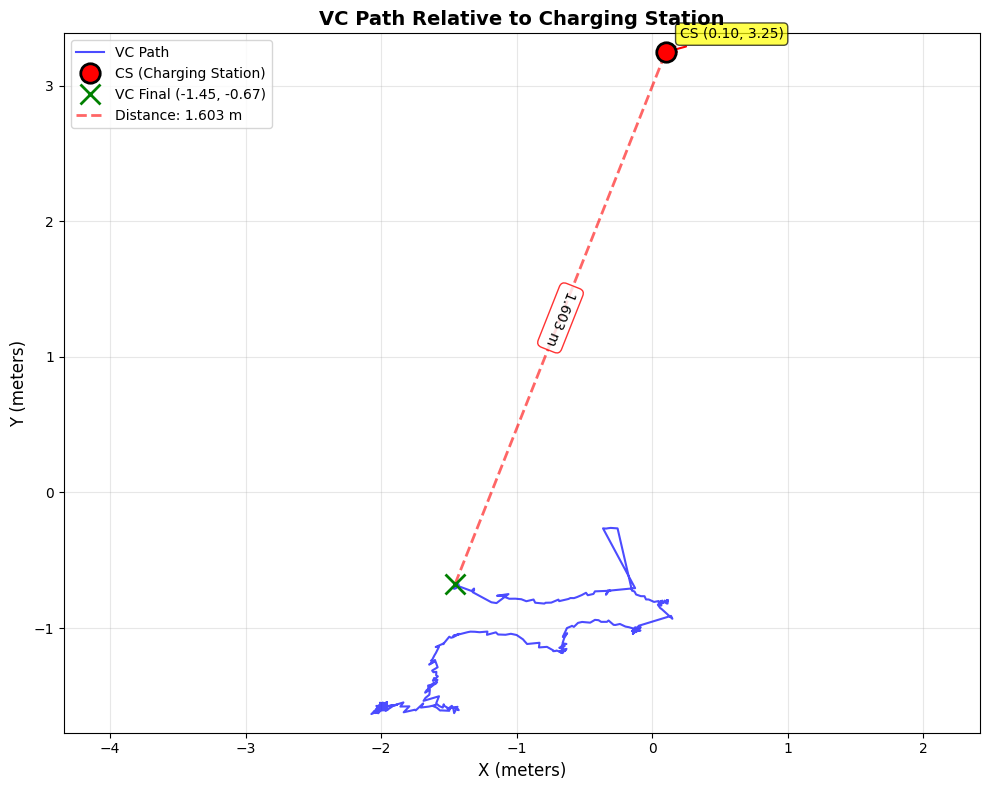

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load CSV
df = pd.read_csv("tag_path_generator/vc_path.csv")  # adjust path if needed

# 2. Extract data
x = df['x']
y = df['y']

# 3. Find the final VC position (last position where robot was actually moving)
# Find the last row where position changed (robot stopped when position becomes constant)
# This handles the case where the node keeps recording the same position after bag finishes
last_changed_idx = len(df) - 1
for i in range(len(df) - 2, -1, -1):
    if abs(df.iloc[i]['x'] - df.iloc[i+1]['x']) > 1e-6 or abs(df.iloc[i]['y'] - df.iloc[i+1]['y']) > 1e-6:
        last_changed_idx = i + 1
        break

x_final = df.iloc[last_changed_idx]['x']
y_final = df.iloc[last_changed_idx]['y']

# 4. CS position (path is relative to CS, so CS)
x_cs = 0.1001
y_cs =3.2497

# 5. Calculate distance from final position to CS
distance = np.sqrt(x_final**2 + y_final**2)
print(f"Final VC Position: ({x_final:.4f}, {y_final:.4f})")
print(f"CS Position: ({x_cs:.4f}, {y_cs:.4f})")
print(f"Distance from CS: {distance:.4f} meters")

# 6. Plot
plt.figure(figsize=(10, 8))
plt.plot(x, y, '-b', label='VC Path', linewidth=1.5, alpha=0.7)          # VC path

# Plot CS with coordinates label
plt.plot(x_cs, y_cs, 'ro', label='CS (Charging Station)', markersize=14, markeredgewidth=2, markeredgecolor='black', zorder=5)
plt.annotate(f'CS ({x_cs:.2f}, {y_cs:.2f})',
             xy=(x_cs, y_cs),
             xytext=(10, 10),
             textcoords='offset points',
             fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='red', lw=1.5))

# Plot VC final position
plt.plot(x_final, y_final, 'gx', label=f'VC Final ({x_final:.2f}, {y_final:.2f})', markersize=15, markeredgewidth=2, zorder=5)

# Draw straight line from VC final to CS
plt.plot([x_final, x_cs], [y_final, y_cs], 'r--', linewidth=2, alpha=0.6, label=f'Distance: {distance:.3f} m', zorder=3)

# Add distance text on the line (midpoint)
mid_x = (x_final + x_cs) / 2
mid_y = (y_final + y_cs) / 2
plt.text(mid_x, mid_y, f'{distance:.3f} m',
         fontsize=10,
         ha='center',
         va='center',
         bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.8, edgecolor='red'),
         rotation=np.degrees(np.arctan2(y_final - y_cs, x_final - x_cs)) if abs(x_final - x_cs) > 1e-6 else 0)

plt.xlabel('X (meters)', fontsize=12)
plt.ylabel('Y (meters)', fontsize=12)
plt.title('VC Path Relative to Charging Station', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.axis('equal')  # keep aspect ratio
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
